## Switching in tethered bacteria

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

In [2]:
filename = 'omega.txt'
with open(filename) as f:
    data = f.readlines()

In [3]:
data = np.array([float(dd) for dd in data])

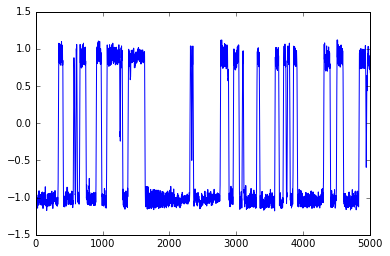

In [4]:
plt.plot(data[:5000])

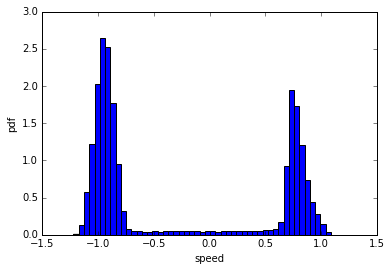

In [5]:
plt.hist(data,normed=True,bins=50)
plt.xlabel('speed')
plt.ylabel('pdf')

In [6]:
#switching time
threshold = 0  #an arbitrary threshold between two binary states via eyeballing...
binarize = data.copy()
binarize[binarize>=threshold] = 1
binarize[binarize<threshold] = -1

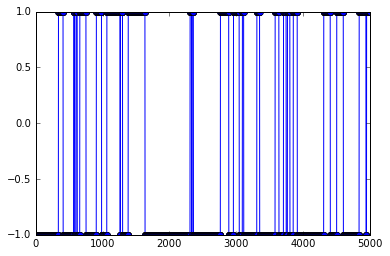

In [7]:
#biniarize
plt.plot(binarize[:5000],'-o')

In [8]:
#find transition
pos = np.where(abs(np.diff(binarize))>0)[0]

In [9]:
#intervals
inter = np.diff(pos)
aa,bb = np.histogram(inter,bins=50);

exponent= -0.008279426980001083


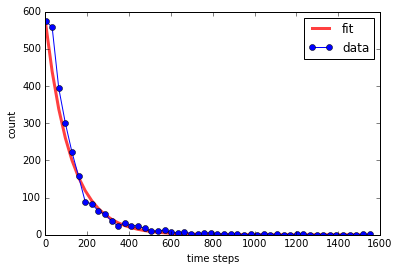

In [16]:
normed = aa/max(aa)
res = np.polyfit(bb[:-1], np.log(aa+10**-3), 1)  #fitting with y=Aexp(x) with logy=ax+b
plt.plot(bb[:-1],max(aa)*np.exp(res[0]*bb[:-1]),linewidth=3,c='r',alpha=0.75,label='fit')
plt.plot(bb[:-1],aa,'-o',label='data')
plt.xlabel('time steps')
plt.ylabel('count')
plt.legend()
print('exponent=',res[0])

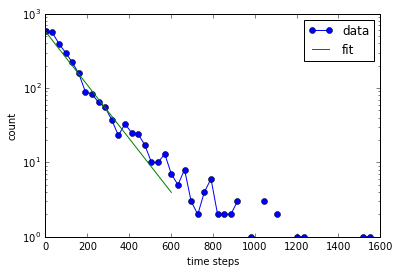

In [11]:
plt.semilogy(bb[:-1],aa,'-o',label='data')
plt.semilogy(bb[:20],max(aa)*np.exp(res[0]*bb[:20]),label='fit')  #cut for finite data on log-plot
plt.xlabel('time steps')
plt.ylabel('count')
plt.legend()

### Ans:

As shown above, the distribution of velocity is bimodal, corresponding to positive and negative velocities. The intervals between transitions of two states captures the time spent in each state and the distribution of this interval can be fit with a Poisson, with exponent shown both in the exponential fit and semi-log plots.

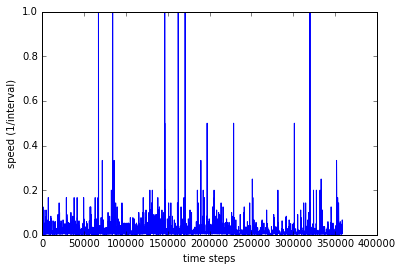

In [17]:
plt.plot(np.cumsum(inter),1/inter);
plt.xlabel('time steps')
plt.ylabel('speed (1/interval)')

In [20]:
#check size
print('number of transitions:',inter.shape[0])
print('number of time points:',binarize.shape[0])

number of transitions: 2743
number of time points: 359002


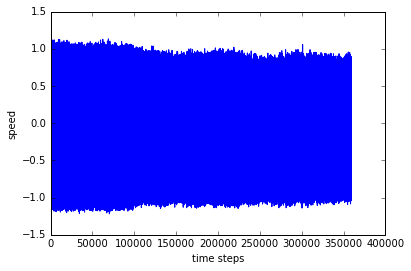

In [19]:
plt.plot(data);
plt.xlabel('time steps')
plt.ylabel('speed')

exponent= -0.010282980618886623
exponent= -0.010915369586522823
exponent= -0.0108292338344846
exponent= -0.01014442168648533
exponent= -0.007412630247689268


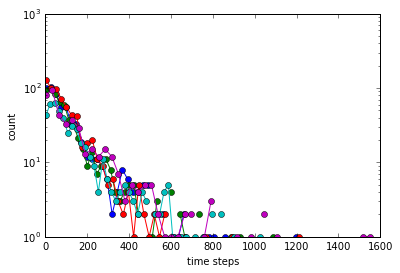

In [32]:
#stationarity of switching
num_windows = 5
win_size= int(binarize.shape[0]/num_windows)
windows = np.arange(win_size,binarize.shape[0],win_size)
windows = np.concatenate((np.array([0]),windows))
for w in range(0,len(windows)-1):
    temp = binarize[windows[w]:windows[w+1]]
    pos = np.where(abs(np.diff(temp))>0)[0]
    inter = np.diff(pos)
    aa,bb = np.histogram(inter,bins=50);
    plt.semilogy(bb[:-1],aa,'-o')
    plt.hold(True)
    
    normed = aa/max(aa)
    res = np.polyfit(bb[:-1], np.log(aa+10**-3), 1)
    print('exponent=',res[0])
    
plt.xlabel('time steps')
plt.ylabel('count')

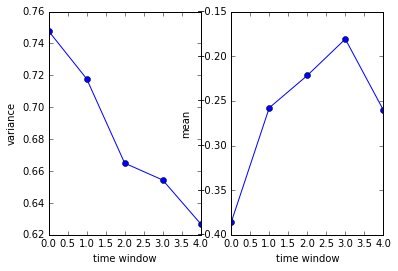

In [33]:
#stationarity of velocity
num_windows = 5
stats = np.zeros((num_windows,2))
win_size= int(data.shape[0]/num_windows)
windows = np.arange(win_size,data.shape[0],win_size)
windows = np.concatenate((np.array([0]),windows))
for w in range(0,len(windows)-1):
    temp = data[windows[w]:windows[w+1]]
    stats[w,0] = np.var(temp)
    stats[w,1] = np.mean(temp)
plt.subplot(121)
plt.plot(stats[:,0],'-o')
plt.xlabel('time window')
plt.ylabel('variance')
plt.subplot(122)
plt.plot(stats[:,1],'-o')
plt.xlabel('time window')
plt.ylabel('mean')

### Ans:

So the varaicne and mean are not strictly time-translational invariant as the variance is clearly decreasing through time in terms of the variance in time windows and the raw data. This does not significanlty affecting the conclusion in (b) as the exponent of the Poisson process fitting is not so different in terms of its exponent.

Sometimes the angular velocity makes a partial switch—a brief excursion away from the typical positive or negative value but not quite a full switch to the opposite direction of rotation. Qualitatively, what is happening in these cases? What would be the simplest model to describe the velocity versus time during such an event? Can you give a quantitative analysis of the data, fitting to your model? This line of inquiry is a bit open ended.

This incomplete switch between states could be observed in the first time series plot above. This means that the flagella suddenly turns between clock-wise and counter-clock-wise motion. A simplist model to fit transitions between two states would be a Markov model described by a transition matrix. The states would mostly be maintained when through time but transiton to the other with a small probability. It is possible to transition forward and back shortly in some cases, giving this not-full switch observed in data.

$T_{ij} = P(V_t=i|V_{t-1}=j)$

$\pi = T_{ij}\pi$

where $T_{ij}$ is the transition matrix from $j$ to $i$ and $\pi$ is a given state. In this data set we can define two states, positive and negative velocity, and fit the transition matrix. This would give us values for transition rate that maintains within state and between states. A sudden change forward and back to the state would be the probabiltiy of the square of elements in the matrix.